In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd

# Path to a benchmark CSV, e.g. produced by bench-mphf-hashing
DATA_ROOT = Path("../..") / "data"
# CSV_PATH = DATA_ROOT / "mphf_hashing_bench_full.csv"
CSV_PATH = DATA_ROOT / "mphf_hashing_glgh_vs.csv"

df = pd.read_csv(CSV_PATH)

In [3]:
df

,strategy,n,seed,build_time_us,query_time_us,query_time_ns_per_key,size_bytes,bits_per_key,m,m_over_n,retries,build_success
0,GlGhStorage,100,142,1204,127,254.000,192,15.36000,143,1.43000,0,1
1,PTHash_single,100,142,596,129,258.000,410,32.80000,100,1.00000,0,1
2,PTHash_partitioned,100,142,949,202,404.000,458,36.64000,100,1.00000,0,1
3,PTHash_dense,100,142,175,0,0.000,0,0.00000,0,0.00000,0,0
4,GlGhStorage,1000,1042,2055,1184,236.800,496,3.96800,1271,1.27100,0,1
5,PTHash_single,1000,1042,2964,1429,285.800,802,6.41600,1000,1.00000,0,1
6,PTHash_partitioned,1000,1042,3000,1389,277.800,850,6.80000,1000,1.00000,0,1
7,PTHash_dense,1000,1042,23,0,0.000,0,0.00000,0,0.00000,0,0
8,GlGhStorage,10000,10042,15246,9600,192.000,3680,2.94400,12589,1.25890,0,1
9,PTHash_single,10000,10042,15798,6938,138.760,3976,3.18080,10000,1.00000,0,1


In [4]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

strategies = df["strategy"].unique()
strategies

array(['GlGhStorage', 'PTHash_single', 'PTHash_partitioned',
       'PTHash_dense'], dtype=object)

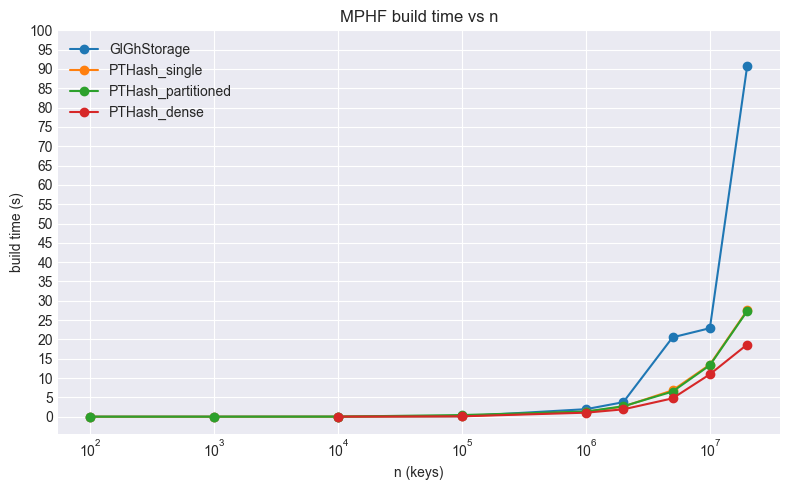

In [15]:
# Build time vs n (seconds) per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    sub = sub[(sub["build_time_us"] > 0) & (sub["query_time_ns_per_key"] > 0) & (sub["bits_per_key"] > 0)]
    if not sub.empty:
        ax.plot(sub["n"], sub["build_time_us"] / 1e6, marker="o", label=s)

ax.set_xscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("build time (s)")
ax.set_title("MPHF build time vs n")
ax.legend()

# Ticks Y cada 5 segundos
import numpy as np
max_build_s = (df["build_time_us"].max() / 1e6)
yticks = np.arange(0, max_build_s + 10, 5)
ax.set_yticks(yticks)

fig.tight_layout()


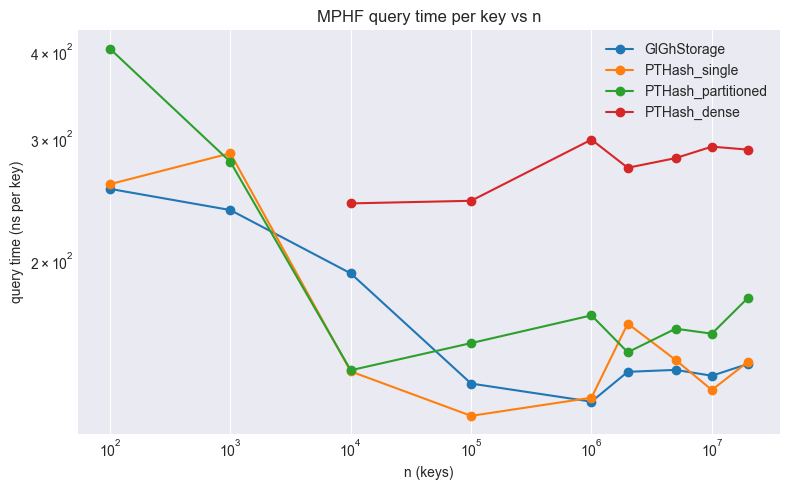

In [16]:
# Query time per key vs n (ns) per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    sub = sub[(sub["build_time_us"] > 0) & (sub["query_time_ns_per_key"] > 0) & (sub["bits_per_key"] > 0)]
    if not sub.empty:
        ax.plot(sub["n"], sub["query_time_ns_per_key"], marker="o", label=s)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("query time (ns per key)")
ax.set_title("MPHF query time per key vs n")
ax.legend()
fig.tight_layout()

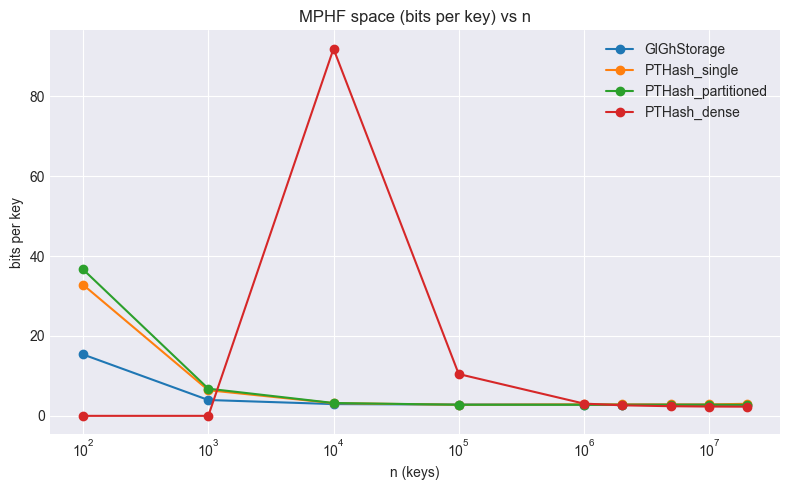

In [ ]:
# Bits per key vs n per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    sub = sub[(sub["build_time_us"] > 0) & (sub["query_time_ns_per_key"] > 0) & (sub["bits_per_key"] > 0)]
    if not sub.empty:
        ax.plot(sub["n"], sub["bits_per_key"], marker="o", label=s)

ax.set_xscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("bits per key")
ax.set_title("MPHF space (bits per key) vs n")
ax.legend()
fig.tight_layout()


In [12]:
# tablita valores 50M
size = 20_000_000

results = df[df["n"] == size][["strategy", "build_time_us", "query_time_ns_per_key", "bits_per_key"]].copy()
results["Build time (s)"] = results["build_time_us"] / 1e6
results["Query time (ns/key)"] = results["query_time_ns_per_key"]
results["Bits per key"] = results["bits_per_key"]
results = results[["strategy", "Build time (s)", "Query time (ns/key)", "Bits per key"]].round(2)
results


,strategy,Build time (s),Query time (ns/key),Bits per key
32,GlGhStorage,90.73,142.26,2.81
33,PTHash_single,27.51,143.29,3.02
34,PTHash_partitioned,27.33,177.12,2.77
35,PTHash_dense,18.67,289.24,2.30
